In [ ]:
!pip install osmnx
!pip install momepy

In [ ]:
import osmnx as ox
import numpy as pd
import geopandas as gpd
import pandas as pd
import fiona as fio
import os
import math
import networkx as nx
import numpy as np

In [ ]:
G = ox.graph_from_place('Burbank, CA, USA', network_type='drive')

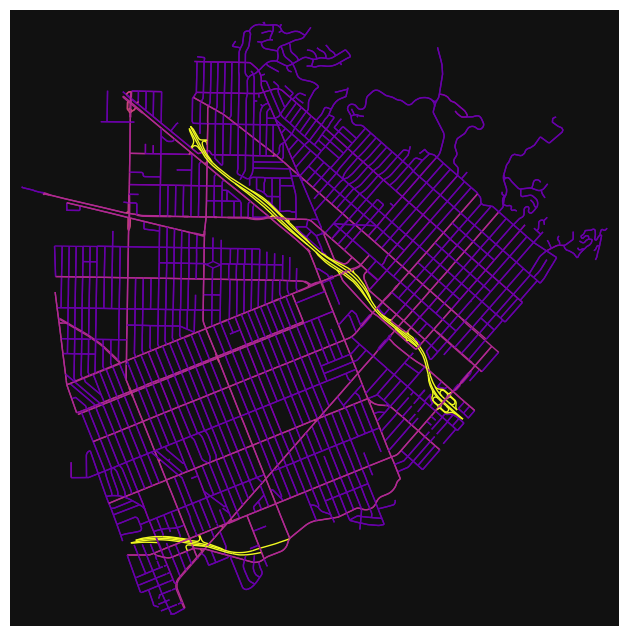

In [ ]:
G = ox.add_edge_speeds(G)
ec = ox.plot.get_edge_colors_by_attr(G, 'speed_kph', cmap='plasma')

fig, ax = ox.plot_graph(G, node_size=0, edge_color = ec)

In [ ]:
nodes, edges = ox.graph_to_gdfs(G, edges=True, nodes=True)

In [ ]:
edges.head()

osmid  \
u        v         key                                                      
10537785 26740011  0    [1049263106, 608855534, 31973422, 31973427, 31...   
10537865 122730799 0                               [402510945, 402510964]   
         14940484  0                    [402510995, 402510980, 402510940]   
         26959286  0                                            723757864   
         21490272  0                                            723757864   

                        oneway lanes  ref                      name  \
u        v         key                                                
10537785 26740011  0      True     6  I 5      Golden State Freeway   
10537865 122730799 0     False     5  NaN  North Glenoaks Boulevard   
         14940484  0     False     4  NaN  North Glenoaks Boulevard   
         26959286  0     False   NaN  NaN             Amherst Drive   
         21490272  0     False   NaN  NaN             Amherst Drive   

                            highway maxspeed reversed   length bridge  \
u        v         key                                                  
10537785 26740011  0       motorway   65 mph    False  445.063    yes   
10537865 122730799 0      secondary      NaN     True  101.895    NaN   
         14940484  0      secondary      NaN    False  111.912    NaN   
         26959286  0    residential      NaN    False  168.947    NaN   
         21490272  0    residential      NaN     True  176.387    NaN   

                                                                 geometry  \
u        v         key                                                      
10537785 26740011  0    LINESTRING (-118.30621 34.17323, -118.30628 34...   
10537865 122730799 0    LINESTRING (-118.31868 34.19228, -118.31900 34...   
         14940484  0    LINESTRING (-118.31868 34.19228, -118.31839 34...   
         26959286  0    LINESTRING (-118.31868 34.19228, -118.31831 34...   
         21490272  0    LINESTRING (-118.31868 34.19228, -118.31901 34...   

                        speed_kph tunnel  
u        v         key                    
10537785 26740011  0        104.6    NaN  
10537865 122730799 0         55.9    NaN  
         14940484  0         55.9    NaN  
         26959286  0         39.7    NaN  
         21490272  0         39.7    NaN

In [ ]:
# Accident Data points for research lab at UC Berkeley.
TIMS_data = pd.read_csv("/content/sample_data/Crashes.csv")

In [ ]:
TIMS_data.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,91159422,2020,2020-01-06,9575,2020-01-02,1722,17491,NaN,4,2,...,0,0,-,-,34.170170,-118.304039,LOS ANGELES,BURBANK,-118.304024,34.170197
1,91159428,2020,2020-01-06,9575,2020-01-03,745,12803,NaN,5,1,...,0,0,-,-,34.191181,-118.327011,LOS ANGELES,BURBANK,-118.326973,34.191231
2,91163553,2020,2020-01-13,9575,2020-01-08,1816,17491,NaN,3,2,...,0,0,-,-,34.155071,-118.317490,LOS ANGELES,BURBANK,-118.317482,34.155106
3,91174814,2020,2020-01-28,9575,2020-01-17,1135,14892,NaN,5,1,...,0,0,-,-,34.154320,-118.343681,LOS ANGELES,BURBANK,-118.343681,34.154320
4,91175733,2020,2020-01-29,9575,2020-01-19,302,21732,NaN,7,3,...,0,0,-,-,34.172112,-118.305641,LOS ANGELES,BURBANK,-118.305641,34.172112


In [ ]:
TIMS_points = gpd.GeoDataFrame(TIMS_data, crs="EPSG:4326", geometry=gpd.points_from_xy(TIMS_data.POINT_X, TIMS_data.POINT_Y))

In [ ]:
road_edges = gpd.sjoin(TIMS_points, edges, how="right")

In [ ]:
road_edges.head()

index_left  CASE_ID  ACCIDENT_YEAR PROC_DATE  JURIS  \
u        v         key                                                        
10537785 26740011  0           NaN      NaN            NaN       NaN    NaN   
10537865 122730799 0           NaN      NaN            NaN       NaN    NaN   
         14940484  0           NaN      NaN            NaN       NaN    NaN   
         26959286  0           NaN      NaN            NaN       NaN    NaN   
         21490272  0           NaN      NaN            NaN       NaN    NaN   

                       COLLISION_DATE  COLLISION_TIME  OFFICER_ID  \
u        v         key                                              
10537785 26740011  0              NaN             NaN         NaN   
10537865 122730799 0              NaN             NaN         NaN   
         14940484  0              NaN             NaN         NaN   
         26959286  0              NaN             NaN         NaN   
         21490272  0              NaN             NaN         NaN   

                        REPORTING_DISTRICT  DAY_OF_WEEK  ...  ref  \
u        v         key                                   ...        
10537785 26740011  0                   NaN          NaN  ...  I 5   
10537865 122730799 0                   NaN          NaN  ...  NaN   
         14940484  0                   NaN          NaN  ...  NaN   
         26959286  0                   NaN          NaN  ...  NaN   
         21490272  0                   NaN          NaN  ...  NaN   

                                            name      highway  maxspeed  \
u        v         key                                                    
10537785 26740011  0        Golden State Freeway     motorway    65 mph   
10537865 122730799 0    North Glenoaks Boulevard    secondary       NaN   
         14940484  0    North Glenoaks Boulevard    secondary       NaN   
         26959286  0               Amherst Drive  residential       NaN   
         21490272  0               Amherst Drive  residential       NaN   

                        reversed   length  bridge  \
u        v         key                              
10537785 26740011  0       False  445.063     yes   
10537865 122730799 0        True  101.895     NaN   
         14940484  0       False  111.912     NaN   
         26959286  0       False  168.947     NaN   
         21490272  0        True  176.387     NaN   

                                                                 geometry  \
u        v         key                                                      
10537785 26740011  0    LINESTRING (-118.30621 34.17323, -118.30628 34...   
10537865 122730799 0    LINESTRING (-118.31868 34.19228, -118.31900 34...   
         14940484  0    LINESTRING (-118.31868 34.19228, -118.31839 34...   
         26959286  0    LINESTRING (-118.31868 34.19228, -118.31831 34...   
         21490272  0    LINESTRING (-118.31868 34.19228, -118.31901 34...   

                       speed_kph tunnel  
u        v         key                   
10537785 26740011  0       104.6    NaN  
10537865 122730799 0        55.9    NaN  
         14940484  0        55.9    NaN  
         26959286  0        39.7    NaN  
         21490272  0        39.7    NaN  

[5 rows x 94 columns]

In [ ]:
road_edges = road_edges.drop(['index_left'], axis=1)
road_edges.head()

CASE_ID  ACCIDENT_YEAR PROC_DATE  JURIS  \
u        v         key                                            
10537785 26740011  0        NaN            NaN       NaN    NaN   
10537865 122730799 0        NaN            NaN       NaN    NaN   
         14940484  0        NaN            NaN       NaN    NaN   
         26959286  0        NaN            NaN       NaN    NaN   
         21490272  0        NaN            NaN       NaN    NaN   

                       COLLISION_DATE  COLLISION_TIME  OFFICER_ID  \
u        v         key                                              
10537785 26740011  0              NaN             NaN         NaN   
10537865 122730799 0              NaN             NaN         NaN   
         14940484  0              NaN             NaN         NaN   
         26959286  0              NaN             NaN         NaN   
         21490272  0              NaN             NaN         NaN   

                        REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  ...  ref  \
u        v         key                                              ...        
10537785 26740011  0                   NaN          NaN        NaN  ...  I 5   
10537865 122730799 0                   NaN          NaN        NaN  ...  NaN   
         14940484  0                   NaN          NaN        NaN  ...  NaN   
         26959286  0                   NaN          NaN        NaN  ...  NaN   
         21490272  0                   NaN          NaN        NaN  ...  NaN   

                                            name      highway  maxspeed  \
u        v         key                                                    
10537785 26740011  0        Golden State Freeway     motorway    65 mph   
10537865 122730799 0    North Glenoaks Boulevard    secondary       NaN   
         14940484  0    North Glenoaks Boulevard    secondary       NaN   
         26959286  0               Amherst Drive  residential       NaN   
         21490272  0               Amherst Drive  residential       NaN   

                       reversed   length  bridge  \
u        v         key                             
10537785 26740011  0      False  445.063     yes   
10537865 122730799 0       True  101.895     NaN   
         14940484  0      False  111.912     NaN   
         26959286  0      False  168.947     NaN   
         21490272  0       True  176.387     NaN   

                                                                 geometry  \
u        v         key                                                      
10537785 26740011  0    LINESTRING (-118.30621 34.17323, -118.30628 34...   
10537865 122730799 0    LINESTRING (-118.31868 34.19228, -118.31900 34...   
         14940484  0    LINESTRING (-118.31868 34.19228, -118.31839 34...   
         26959286  0    LINESTRING (-118.31868 34.19228, -118.31831 34...   
         21490272  0    LINESTRING (-118.31868 34.19228, -118.31901 34...   

                       speed_kph tunnel  
u        v         key                   
10537785 26740011  0       104.6    NaN  
10537865 122730799 0        55.9    NaN  
         14940484  0        55.9    NaN  
         26959286  0        39.7    NaN  
         21490272  0        39.7    NaN  

[5 rows x 93 columns]

In [ ]:
gdf_cycleways = gpd.read_file("/content/sample_data/Bike_Routes_%E2%80%93_SCAG_Region.zip", geometry="geometry")
gdf_cycleways.head()

,OBJECTID,NAME,CITY,COUNTY,CLASS_E,FACDES_E,CLASS_P,FACDES_P,INSTALL_DA,MILES_1,...,APP_ID,FTIP_ID,RBN,NOTES,YEAR,BIKEDIR,LANECOUNT,PLAN_NAME,Shapelen,geometry
0,1,Grand Ave,Diamond Bar,Los Angeles County,2,None,0,None,None,0.00173,...,0,0,None,None,2019,None,0,San Bernardino County Non-Motorized Transporta...,2.795049,"LINESTRING (-117.79115 33.99470, -117.79112 33..."
1,2,Hellman Ave,Eastvale,Riverside County,0,None,1,None,None,1.01910,...,0,0,None,None,2019,None,0,San Bernardino County Non-Motorized Transporta...,1640.092825,"MULTILINESTRING ((-117.61100 33.96526, -117.61..."
2,3,Hellman Ave,Eastvale,Riverside County,0,None,2,None,None,1.24939,...,0,0,None,None,2019,None,0,San Bernardino County Non-Motorized Transporta...,2010.700514,"MULTILINESTRING ((-117.61092 33.94943, -117.61..."
3,4,Sierra Ave,Jurupa Valley,Riverside County,0,None,2,None,None,0.02935,...,0,0,None,Added based on local input (City of Fontana),2019,None,0,San Bernardino County Non-Motorized Transporta...,47.236466,"LINESTRING (-117.43325 34.03418, -117.43300 34..."
4,5,Cactus Ave,Jurupa Valley,Riverside County,0,None,2,None,None,0.01826,...,0,0,None,None,2019,None,0,San Bernardino County Non-Motorized Transporta...,29.401198,"LINESTRING (-117.38328 34.03411, -117.38328 34..."


In [ ]:
for col in gdf_cycleways.columns:
  print(col)

OBJECTID
NAME
CITY
COUNTY
CLASS_E
FACDES_E
CLASS_P
FACDES_P
INSTALL_DA
MILES_1
ON_
FROM_
TO_
PLAN_ADOP
PLAN_JURIS
PLAN_URL
APP_ID
FTIP_ID
RBN
NOTES
YEAR
BIKEDIR
LANECOUNT
PLAN_NAME
Shapelen
geometry


In [ ]:
# So that we know how to append nodes in the Burbank Street Network to the cycleways in the SCAG shapefile.
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
10537785,34.173225,-118.306211,3,NaN,NaN,POINT (-118.30621 34.17323)
10537865,34.192284,-118.318677,4,traffic_signals,NaN,POINT (-118.31868 34.19228)
10537871,34.181023,-118.303244,4,traffic_signals,NaN,POINT (-118.30324 34.18102)
14758466,34.184283,-118.321734,6,traffic_signals,NaN,POINT (-118.32173 34.18428)
14758467,34.177441,-118.318401,4,traffic_signals,NaN,POINT (-118.31840 34.17744)


In [ ]:
def linestring_to_points(lines):
  # Only need the first coordinate in a multilinestring.
  for line in lines:
      return {line.coords}

gdf_cycleways['points'] = gdf_cycleways.apply(lambda l: linestring_to_points(gdf_cycleways["geometry"]), axis=1)

In [ ]:
bikeway_edges = gdf_cycleways[(gdf_cycleways['CITY'] == "Burbank")]
bikeway_edges["length"] = bikeway_edges["MILES_1"]*1609.34
bikeway_edges["speed_kph"] = 25.0
bikeway_edges.head()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,OBJECTID,NAME,CITY,COUNTY,CLASS_E,FACDES_E,CLASS_P,FACDES_P,INSTALL_DA,MILES_1,...,NOTES,YEAR,BIKEDIR,LANECOUNT,PLAN_NAME,Shapelen,geometry,points,length,speed_kph
4051,4052,None,Burbank,Los Angeles County,2,None,0,None,6/10/2013,0.38723,...,None,2019,None,0,None,623.188341,"LINESTRING (-118.36216 34.20129, -118.36215 34...","{((-117.79114661636707, 33.99469892469378), (-...",623.184728,25.0
4117,4118,N CALIFORNIA ST,Burbank,Los Angeles County,3,None,0,None,None,0.03813,...,None,2019,None,0,13-Burbank-Bicycle Master Plan-2009,61.375263,"MULTILINESTRING ((-118.34269 34.16873, -118.34...","{((-117.79114661636707, 33.99469892469378), (-...",61.364134,25.0
4180,4181,E VERDUGO AV,Burbank,Los Angeles County,2,None,0,None,None,0.41369,...,None,2019,None,0,13-Burbank-Bicycle Master Plan-2009,665.775628,"MULTILINESTRING ((-118.30448 34.17988, -118.30...","{((-117.79114661636707, 33.99469892469378), (-...",665.767865,25.0
4211,4212,N 3RD ST,Burbank,Los Angeles County,2,None,0,None,None,0.78937,...,None,2019,None,0,13-Burbank-Bicycle Master Plan-2009,1270.382783,"MULTILINESTRING ((-118.30850 34.18281, -118.30...","{((-117.79114661636707, 33.99469892469378), (-...",1270.364716,25.0
4216,4217,N FRONT ST,Burbank,Los Angeles County,2,None,0,None,None,0.62171,...,None,2019,None,0,13-Burbank-Bicycle Master Plan-2009,1000.551244,"MULTILINESTRING ((-118.31438 34.18063, -118.31...","{((-117.79114661636707, 33.99469892469378), (-...",1000.542771,25.0


<Axes: >

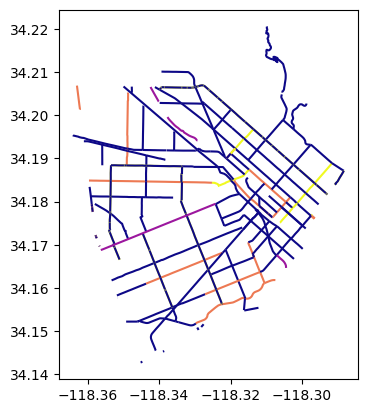

In [ ]:
bikeway_edges.plot(column="CLASS_E", cmap='plasma')

<ipython-input-19-8f88699532dc>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined_edges = bikeway_edges.append(road_edges)


<Axes: >

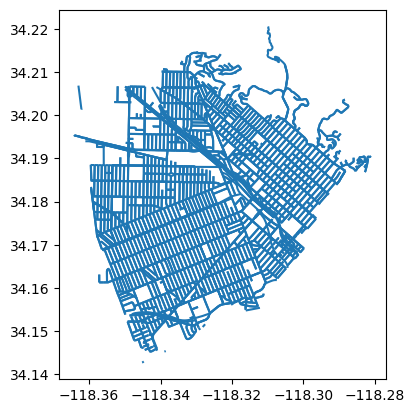

In [ ]:
joined_edges = bikeway_edges.append(road_edges)
joined_edges.plot()

In [ ]:
# Speed as a factor.
joined_edges["normalized bike safety score"] = joined_edges["speed_kph"] / joined_edges["speed_kph"].abs().max()

# Length as a factor.
joined_edges["normalized bike safety score"] = joined_edges["normalized bike safety score"] + joined_edges["length"] / joined_edges["length"].abs().max()

# Road type as a factor.
def MakeTypeNumeric(road):
  if (road == "trunk" or road == "trunk_link"):
    return 6
  elif (road== "primary" or road == "primary_link"):
    return 5
  elif (road == "secondary" or road == "secondary_link" ):
    return 4
  elif (road == "tertiary" or road == "tertiary_link"):
    return 3
  elif (road == "residential"):
    return 2
  elif (road == "unclassified"):
    return 1
  return 1
joined_edges["Road Type Intensity Score"] = joined_edges["highway"].apply(MakeTypeNumeric)
joined_edges["normalized bike safety score"] = joined_edges["normalized bike safety score"] + joined_edges["Road Type Intensity Score"] / joined_edges["Road Type Intensity Score"].abs().max()

# Number of lanes as a factor.
def MakeLanesTypeNumeric(road):
  if road == "1" or road == "2" or road == "3"  or road == "4" or road == "5":
      return float(road)
  return 0.0
joined_edges["Lanes Int"] = joined_edges["lanes"].apply(MakeLanesTypeNumeric)
joined_edges["normalized bike safety score"] = joined_edges["normalized bike safety score"] + joined_edges["Lanes Int"] / joined_edges["Lanes Int"].abs().max()

# Accidents as a factor.
def MakeAccidentTypeNumeric(road):
  if road == "2020" or road == "2021" or road == "2022":
      return 100.0
  return 1.0
joined_edges["Accident Int"] = joined_edges["ACCIDENT_YEAR"].apply(MakeAccidentTypeNumeric)
joined_edges["normalized bike safety score"] = joined_edges["normalized bike safety score"] + joined_edges["Accident Int"] / joined_edges["Accident Int"].abs().max()

# Look at existing bike lane infrastructure.
def ExistingBikeLanes(road):
  if (road == 1.0):
    return 1
  elif (road == 4.0):
    return 2
  elif (road== 2.0):
    return 3
  elif (road == 3.0):
    return 4
  elif (road == 5.0):
    return 5
  return 6
joined_edges["Bike Lane Score"] = joined_edges["CLASS_E"].apply(ExistingBikeLanes)
joined_edges["normalized bike safety score"] = joined_edges["normalized bike safety score"] + joined_edges["Bike Lane Score"] / joined_edges["Bike Lane Score"].abs().max()


# Divide to make normalized
joined_edges["normalized bike safety score"] = joined_edges["normalized bike safety score"] / 6

# Make all motorways and ramps to motorways a score of 1.
joined_edges.loc[joined_edges['highway'] == 'motorway', 'normalized bike safety score'] = 1
joined_edges.loc[joined_edges['highway'] == 'motorway_link', 'normalized bike safety score'] = 1

joined_edges["normalized bike safety score"].head()

4051    0.343716
4117    0.352969
4180    0.345120
4211    0.365056
4216    0.356159
Name: normalized bike safety score, dtype: float64

In [ ]:
threshhold_bike_score = (48.2803 / joined_edges["speed_kph"].max() + 100.584 / joined_edges["length"].max() + 3 / joined_edges["Road Type Intensity Score"].max() + 2 / joined_edges["Bike Lane Score"].max() + 1 / joined_edges["Lanes Int"].max()) / 6

print(joined_edges["speed_kph"].max())
print(joined_edges["length"].max())
print(joined_edges["Road Type Intensity Score"].max())
print(joined_edges["Bike Lane Score"].max())
print(joined_edges["Lanes Int"].max())

print(threshhold_bike_score)

104.6
5054.615072
5
6
5.0
0.2691339195302933


<Axes: >

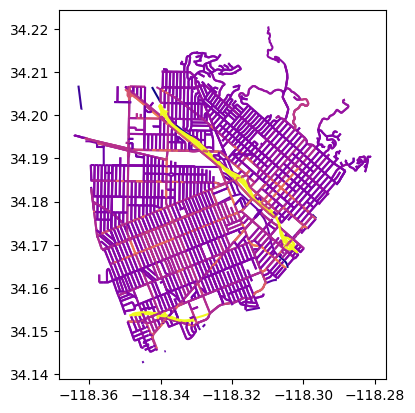

In [ ]:
joined_edges.plot(column="normalized bike safety score", cmap='plasma')

In [ ]:
# Subtract from 1, higher scores make more sense as safer streets when measuring "safety"
joined_edges["normalized bike safety score"] = 1 - joined_edges["normalized bike safety score"]
joined_edges["normalized bike safety score"].head()

4051    0.656284
4117    0.647031
4180    0.654880
4211    0.634944
4216    0.643841
Name: normalized bike safety score, dtype: float64

In [ ]:
joined_edges["geometry"].head()

4051    LINESTRING (-118.36216 34.20129, -118.36215 34...
4117    MULTILINESTRING ((-118.34269 34.16873, -118.34...
4180    MULTILINESTRING ((-118.30448 34.17988, -118.30...
4211    MULTILINESTRING ((-118.30850 34.18281, -118.30...
4216    MULTILINESTRING ((-118.31438 34.18063, -118.31...
Name: geometry, dtype: geometry

In [ ]:
joined_edges.dropna(subset=['normalized bike safety score'], inplace=True)
joined_edges.head()

,OBJECTID,NAME,CITY,COUNTY,CLASS_E,FACDES_E,CLASS_P,FACDES_P,INSTALL_DA,MILES_1,...,highway,maxspeed,reversed,bridge,tunnel,normalized bike safety score,Road Type Intensity Score,Lanes Int,Accident Int,Bike Lane Score
4051,4052.0,None,Burbank,Los Angeles County,2.0,None,0.0,None,6/10/2013,0.38723,...,NaN,NaN,NaN,NaN,NaN,0.656284,1,0.0,1.0,3
4117,4118.0,N CALIFORNIA ST,Burbank,Los Angeles County,3.0,None,0.0,None,None,0.03813,...,NaN,NaN,NaN,NaN,NaN,0.647031,1,0.0,1.0,4
4180,4181.0,E VERDUGO AV,Burbank,Los Angeles County,2.0,None,0.0,None,None,0.41369,...,NaN,NaN,NaN,NaN,NaN,0.654880,1,0.0,1.0,3
4211,4212.0,N 3RD ST,Burbank,Los Angeles County,2.0,None,0.0,None,None,0.78937,...,NaN,NaN,NaN,NaN,NaN,0.634944,1,0.0,1.0,3
4216,4217.0,N FRONT ST,Burbank,Los Angeles County,2.0,None,0.0,None,None,0.62171,...,NaN,NaN,NaN,NaN,NaN,0.643841,1,0.0,1.0,3


In [ ]:
joined_edges.set_geometry(col="geometry")
joined_edges["geometry"].head()

4051    LINESTRING (-118.36216 34.20129, -118.36215 34...
4117    MULTILINESTRING ((-118.34269 34.16873, -118.34...
4180    MULTILINESTRING ((-118.30448 34.17988, -118.30...
4211    MULTILINESTRING ((-118.30850 34.18281, -118.30...
4216    MULTILINESTRING ((-118.31438 34.18063, -118.31...
Name: geometry, dtype: geometry

In [ ]:
joined_edges.index = np.arange(joined_edges.shape[0])
joined_edges.head()

,OBJECTID,NAME,CITY,COUNTY,CLASS_E,FACDES_E,CLASS_P,FACDES_P,INSTALL_DA,MILES_1,...,highway,maxspeed,reversed,bridge,tunnel,normalized bike safety score,Road Type Intensity Score,Lanes Int,Accident Int,Bike Lane Score
0,4052.0,None,Burbank,Los Angeles County,2.0,None,0.0,None,6/10/2013,0.38723,...,NaN,NaN,NaN,NaN,NaN,0.656284,1,0.0,1.0,3
1,4118.0,N CALIFORNIA ST,Burbank,Los Angeles County,3.0,None,0.0,None,None,0.03813,...,NaN,NaN,NaN,NaN,NaN,0.647031,1,0.0,1.0,4
2,4181.0,E VERDUGO AV,Burbank,Los Angeles County,2.0,None,0.0,None,None,0.41369,...,NaN,NaN,NaN,NaN,NaN,0.654880,1,0.0,1.0,3
3,4212.0,N 3RD ST,Burbank,Los Angeles County,2.0,None,0.0,None,None,0.78937,...,NaN,NaN,NaN,NaN,NaN,0.634944,1,0.0,1.0,3
4,4217.0,N FRONT ST,Burbank,Los Angeles County,2.0,None,0.0,None,None,0.62171,...,NaN,NaN,NaN,NaN,NaN,0.643841,1,0.0,1.0,3


In [ ]:
print(joined_edges.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4973 entries, 0 to 4972
Columns: 122 entries, OBJECTID to Bike Lane Score
dtypes: float64(54), geometry(1), int64(2), object(65)
memory usage: 4.7+ MB
None


In [ ]:
# Select columns with 'object' data type
object_columns = joined_edges.select_dtypes(include='object').columns

# Drop the selected columns from the GeoDataFrame so we can save into a shapefile.
joined_edges = joined_edges.drop(columns=object_columns)

In [ ]:
print(joined_edges.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4973 entries, 0 to 4972
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   OBJECTID                      156 non-null    float64 
 1   CLASS_E                       156 non-null    float64 
 2   CLASS_P                       156 non-null    float64 
 3   MILES_1                       156 non-null    float64 
 4   APP_ID                        156 non-null    float64 
 5   FTIP_ID                       156 non-null    float64 
 6   YEAR                          156 non-null    float64 
 7   LANECOUNT                     156 non-null    float64 
 8   Shapelen                      156 non-null    float64 
 9   geometry                      4973 non-null   geometry
 10  length                        4973 non-null   float64 
 11  speed_kph                     4973 non-null   float64 
 12  CASE_ID                       0 non-null

In [ ]:
joined_edges.to_file("/content/sample_data/BurbankBikeSafety.gpkg")